In [1]:
import os
import numpy as np
import pandas as pd
from IPython.display import display
import matplotlib.pyplot as plt
import seaborn as sns
import polars as pl

In [2]:
data = pl.read_csv('./dataset/5.Funnel_Analysis/user_table.csv')
home = pl.read_csv('./dataset/5.Funnel_Analysis/home_page_table.csv')
search = pl.read_csv('./dataset/5.Funnel_Analysis/search_page_table.csv')
payment = pl.read_csv('./dataset/5.Funnel_Analysis/payment_page_table.csv')
confirmation = pl.read_csv('./dataset/5.Funnel_Analysis/payment_confirmation_table.csv')

In [3]:
data = data.with_columns(
    pl.col('date').str.to_date()
)

In [9]:
data = data.with_columns(
    pl.col('user_id').is_in(home['user_id'].to_list()).alias('home'),
    pl.col('user_id').is_in(search['user_id'].to_list()).alias('search'),
    pl.col('user_id').is_in(payment['user_id'].to_list()).alias('payment'),
    pl.col('user_id').is_in(confirmation['user_id'].to_list()).alias('confirmation')
)

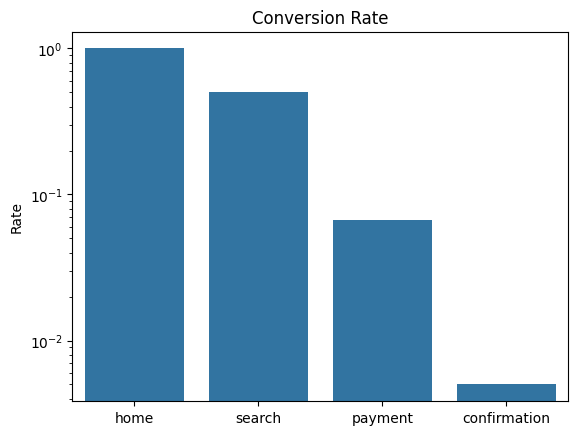

In [11]:
home_rate = data['home'].mean()
search_rate = data['search'].mean()
payment_rate = data['payment'].mean()
confirmation_rate = data['confirmation'].mean()

# plot
fig, ax = plt.subplots()
sns.barplot(x=['home', 'search', 'payment', 'confirmation'], y=[home_rate, search_rate, payment_rate, confirmation_rate], ax=ax)
ax.set_ylabel('Rate')
ax.set_title('Conversion Rate')
ax.set_yscale('log')
plt.show()

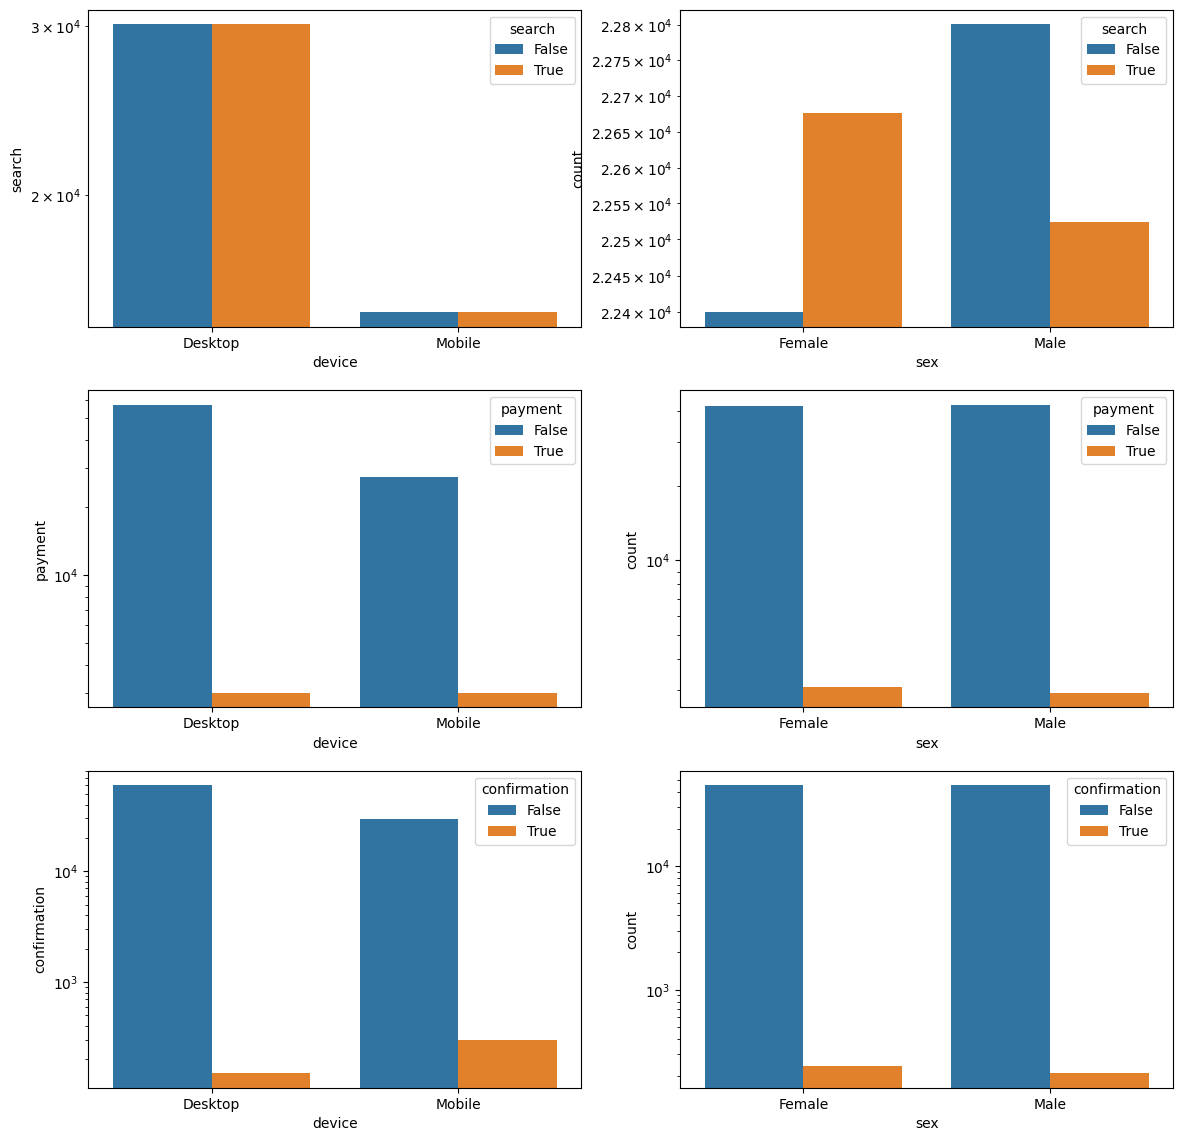

In [12]:
fig, ax = plt.subplots(3, 2, figsize=(14, 14))
sns.countplot(x='device', hue='search', data=data, ax=ax[0, 0])
sns.countplot(x='sex', hue='search', data=data, ax=ax[0, 1])
sns.countplot(x='device', hue='payment', data=data, ax=ax[1, 0])
sns.countplot(x='sex', hue='payment', data=data, ax=ax[1, 1])
sns.countplot(x='device', hue='confirmation', data=data, ax=ax[2, 0])
sns.countplot(x='sex', hue='confirmation', data=data, ax=ax[2, 1])
ax[0, 0].set_ylabel('search')
ax[1, 0].set_ylabel('payment')
ax[2, 0].set_ylabel('confirmation')
plt.setp(ax, yscale='log');

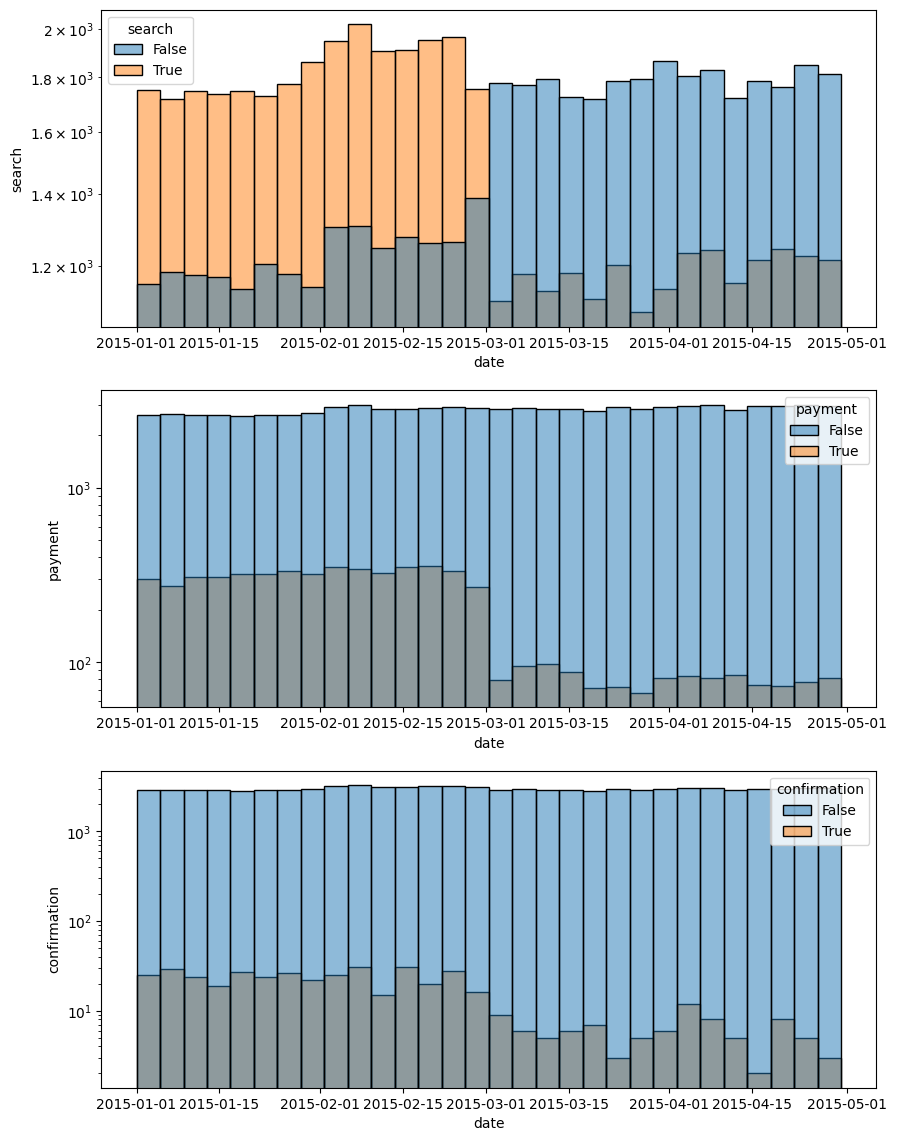

In [13]:
fig, ax = plt.subplots(3, 1, figsize=(10, 14))
sns.histplot(data=data, x='date', hue='search', bins=30, ax=ax[0])
sns.histplot(data=data, x='date', hue='payment', bins=30, ax=ax[1])
sns.histplot(data=data, x='date', hue='confirmation', bins=30, ax=ax[2])
ax[0].set_ylabel('search')
ax[1].set_ylabel('payment')
ax[2].set_ylabel('confirmation')
plt.setp(ax, yscale='log');

In [16]:
data = data.with_columns(
    pl.col('date').dt.weekday().alias('weekday')
)

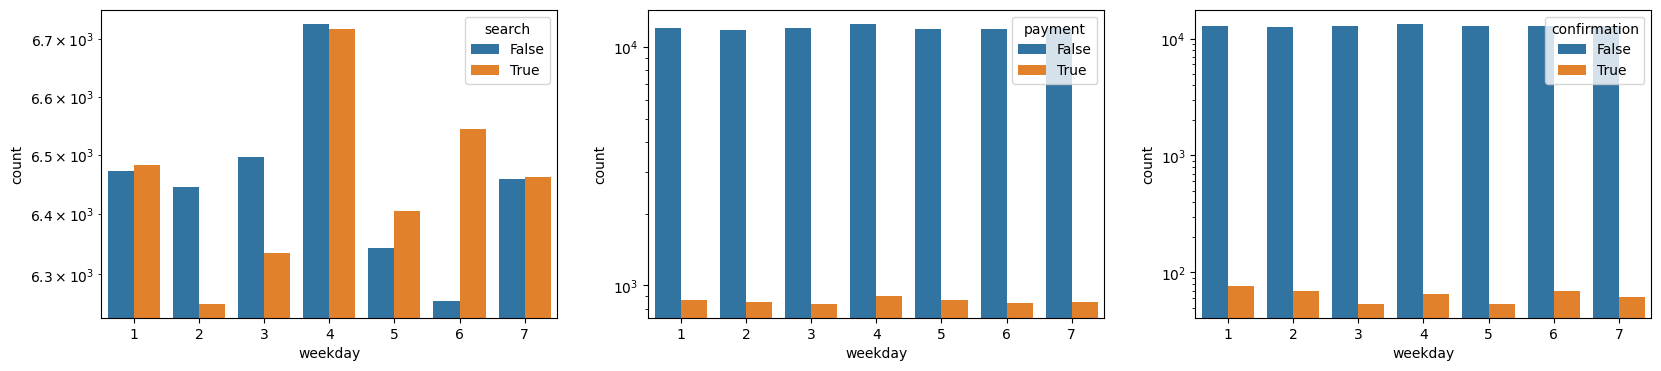

In [ ]:
fig, ax = plt.subplots(1, 3, figsize=(20, 4))
sns.countplot(x='weekday', hue='search', data=data, ax=ax[0])
sns.countplot(x='weekday', hue='payment', data=data, ax=ax[1])
sns.countplot(x='weekday', hue='confirmation', data=data, ax=ax[2])
plt.setp(ax, yscale='log');
# Monday=1, Sunday=7